# ex1 linear regression

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.chdir('F:\\Mymaterial\\ML\\ng\\homework\\ex\\machine-learning-ex1\\ex1')
# read data
data_train = pd.read_csv('ex1data1.txt',names=['x','y'])

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
x    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
X_train = data_train.x.as_matrix()
y_train = data_train.y.as_matrix()

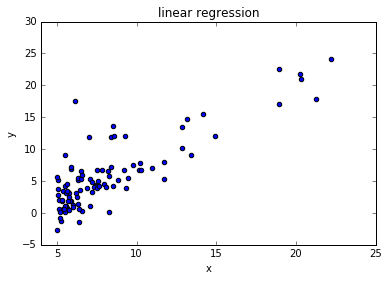

In [5]:
plt.scatter(X_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(4,25)
plt.title('linear regression')

In [6]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
m = X_train.shape[0]

In [7]:
def initiate_parameters():
    
    w = 0
    b = 0
    
    return w, b

In [8]:
w, b = initiate_parameters()
print(str(w))
print(str(b))

0
0


In [9]:
def propagate(w, b, X, y):
 
    grads = {}
    
    m = X.shape[0]
    
    Z = np.dot(X, w) + b
    cost = np.sum(np.power(Z-y,2) / 2 / m)

    dw = np.dot((Z-y).T,X) / m
    db = np.sum(Z-y) / m
    grads = {'dw': dw,
             'db': db}
    
    return grads, cost

In [10]:
grads, cost = propagate(w,b, X_train, y_train)

print('dw = ' + str(grads['dw']))
print('db = ' + str(grads['db']))
print('cost = ' + str(cost))

dw = [[-65.32884975]]
db = -5.83913505155
cost = 32.0727338775


In [11]:
def optimize(w, b, X, y, num_iterations, learning_rate):
    
    costs = []

    #print(str(w))
    #print(str(b))
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, y)
        
        dw = grads['dw']
        db = grads['db']
        
        #print(str(dw))
        #print(str(db))
        
        w = w - learning_rate * dw
        b = b - learning_rate * dw
        
        #print(str(w))
        #print(str(b))
       
        if i % 10 == 0:
            costs.append(cost)
            print('Cost after iteration %i: %f' % (i, cost))
        
    parameters = {'w': w,
                  'b': b} 
    grads = {'dw': dw,
             'db': db}
        
    return parameters, grads, costs

In [12]:
w,b = initiate_parameters()
params, grads, costs = optimize(w, b, X_train, y_train, num_iterations=200, learning_rate=0.022)
print('w = ' + str(params['w']))
print('b = ' + str(params['b']))
print('dw = ' + str(grads['dw']))
print('db = ' + str(grads['db']))

Cost after iteration 0: 32.072734
Cost after iteration 10: 20.369977
Cost after iteration 20: 13.983714
Cost after iteration 30: 10.504661
Cost after iteration 40: 8.613811
Cost after iteration 50: 7.589452
Cost after iteration 60: 7.036982
Cost after iteration 70: 6.740870
Cost after iteration 80: 6.583554
Cost after iteration 90: 6.501034
Cost after iteration 100: 6.458555
Cost after iteration 110: 6.437314
Cost after iteration 120: 6.427185
Cost after iteration 130: 6.422755
Cost after iteration 140: 6.421159
Cost after iteration 150: 6.420900
Cost after iteration 160: 6.421215
Cost after iteration 170: 6.421725
Cost after iteration 180: 6.422256
Cost after iteration 190: 6.422732
w = [[ 0.72761978]]
b = [[ 0.72761978]]
dw = [[ 0.16539424]]
db = 0.859046122716


(0, 35)

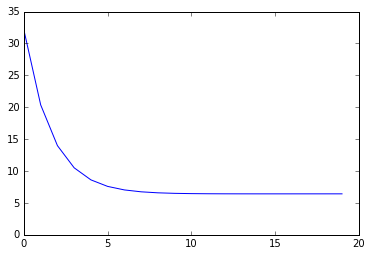

In [13]:
plt.plot(costs)
plt.ylim(0,35)


In [14]:
w = params['w']
b = params['b']
y_predtion = np.dot(X_train, w) + b

(4, 25)

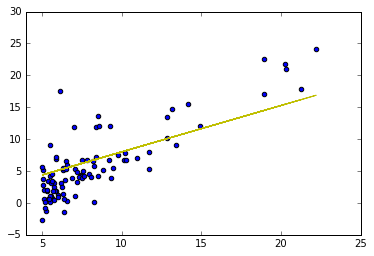

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predtion, 'y')
plt.xlim(4,25)

## Using sklearn

In [16]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [17]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred = model_lr.predict(X_train)

(4, 25)

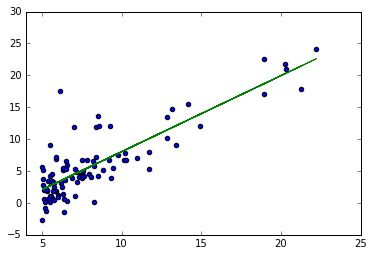

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'g')
plt.xlim(4,25)


### compare

(4, 25)

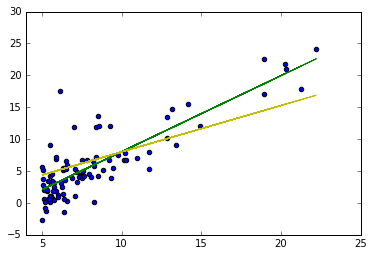

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'g')
plt.plot(X_train, y_predtion, 'y')
plt.xlim(4,25)

### change initiate parameters, using np.random.random()

In [21]:
def initiate_params():
    np.random.seed(1)
    w = np.random.random() * 0.01
    b = np.random.random() * 0.01
    
    return w, b

In [22]:
w1, b1 = initiate_params()
print(w1)
print(b1)

0.00417022004702574
0.007203244934421581


In [23]:
params1, grads1, costs1 = optimize(w1, b1, X_train, y_train, num_iterations=150, learning_rate=0.022)
print('w = ' + str(params1['w']))
print('b = ' + str(params1['b']))
print('dw = ' + str(grads1['dw']))
print('db = ' + str(grads1['db']))

Cost after iteration 0: 31.759216
Cost after iteration 10: 20.199766
Cost after iteration 20: 13.891914
Cost after iteration 30: 10.455730
Cost after iteration 40: 8.588294
Cost after iteration 50: 7.576705
Cost after iteration 60: 7.031186
Cost after iteration 70: 6.738847
Cost after iteration 80: 6.583574
Cost after iteration 90: 6.502152
Cost after iteration 100: 6.460261
Cost after iteration 110: 6.439330
Cost after iteration 120: 6.429363
Cost after iteration 130: 6.425016
Cost after iteration 140: 6.423461
w = [[ 0.72113541]]
b = [[ 0.72416844]]
dw = [[ 0.73836821]]
db = 0.918146837646


### nothing change

### multiple

In [24]:
data_train = pd.read_csv('ex1data2.txt',names=['x1','x2','y'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
x1    47 non-null int64
x2    47 non-null int64
y     47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [25]:
X_train = data_train[['x1','x2']].as_matrix()
y_train = data_train.y.as_matrix()

In [26]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = model_lr.predict(X_train)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

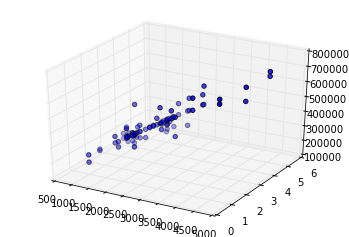

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_train.x1, data_train.x2, data_train.y)
ax.scatter(data_train.x1, data_train.x2, y_pred, 'r')